In [1]:
from copy import deepcopy
import os
import numpy as np
import sncosmo

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from LSSTmetrics import PerSNMetric
import gedankenLSST

In [3]:
from lsst.sims.photUtils import BandpassDict

In [4]:
lsst_bp = BandpassDict.loadTotalBandpassesFromFiles()

In [5]:
dailyCadence = deepcopy(gedankenLSST.LSSTReq)

In [6]:
# sncosmo Bandpasses required for fitting
throughputsdir = os.getenv('THROUGHPUTS_DIR')

from astropy.units import Unit
bandPassList = ['u', 'g', 'r', 'i', 'z', 'y']
banddir = os.path.join(os.getenv('THROUGHPUTS_DIR'), 'baseline')

for band in bandPassList:

    # setup sncosmo bandpasses
    bandfname = banddir + "/total_" + band + '.dat'


    # register the LSST bands to the SNCosmo registry
    # Not needed for LSST, but useful to compare independent codes
    # Usually the next two lines can be merged,
    # but there is an astropy bug currently which affects only OSX.
    numpyband = np.loadtxt(bandfname)
    print band
    sncosmoband = sncosmo.Bandpass(wave=numpyband[:, 0],
                                   trans=numpyband[:, 1],
                                   wave_unit=Unit('nm'),
                                   name=band)
    sncosmo.registry.register(sncosmoband, force=True)

u
g
r
i
z
y


In [7]:
#Now create a set of observations at a particular ra, dec within a a time window
observations = gedankenLSST.GSN_Obs(mjd_center=49570., 
                                    lsstrequirements=dailyCadence,
                                    ra=58., dec=-27.,
                                    timeWindow=[-30., 50.])

##  PerSNMetric: obtaining the State

In [20]:
observations.summary

,expMJD,filter,ra,dec,fiveSigmaDepth,fieldID,night
0,49540.000000,g,58,-27,25.0,1,49540
1,49566.666667,g,58,-27,25.0,1,49566
2,49593.333333,g,58,-27,25.0,1,49593
3,49540.000000,i,58,-27,24.0,1,49540
4,49556.000000,i,58,-27,24.0,1,49556
5,49572.000000,i,58,-27,24.0,1,49572
6,49588.000000,i,58,-27,24.0,1,49588
7,49604.000000,i,58,-27,24.0,1,49604
8,49540.000000,r,58,-27,24.7,1,49540
9,49556.000000,r,58,-27,24.7,1,49556


In [21]:
q = PerSNMetric(summarydf=observations.summary, t0=49570,  raCol='ra', decCol='dec', lsst_bp=lsst_bp)

In [22]:
print q.SN

source:
  class      : SALT2Source
  name       : 'salt2-extended'
  version    : 1.0
  phases     : [-20, .., 50] days
  wavelengths: [300, .., 18000] Angstroms
effect (name='host' frame='rest'):
  class           : OD94Dust
  wavelength range: [909.09, 33333.3] Angstroms
effect (name='mw' frame='obs'):
  class           : OD94Dust
  wavelength range: [909.09, 33333.3] Angstroms
parameters:
  z       = 0.5
  t0      = 49570.0
  x0      = 1.0068661711630977e-05
  x1      = 0.0
  c       = 0.0
  hostebv = 0.0
  hostr_v = 3.1000000000000001
  mwebv   = 0.0
  mwr_v   = 3.1000000000000001


In [29]:
xx = q.lightcurve.copy()

(19, Index([u'expMJD', u'filter', u'ra', u'dec', u'fiveSigmaDepth', u'fieldID',
       u'night'],
      dtype='object'))


In [36]:
xx['mag'] = -2.5 * np.log10(xx.flux)

(19, Index([u'expMJD', u'filter', u'ra', u'dec', u'fiveSigmaDepth', u'fieldID',
       u'night'],
      dtype='object'))


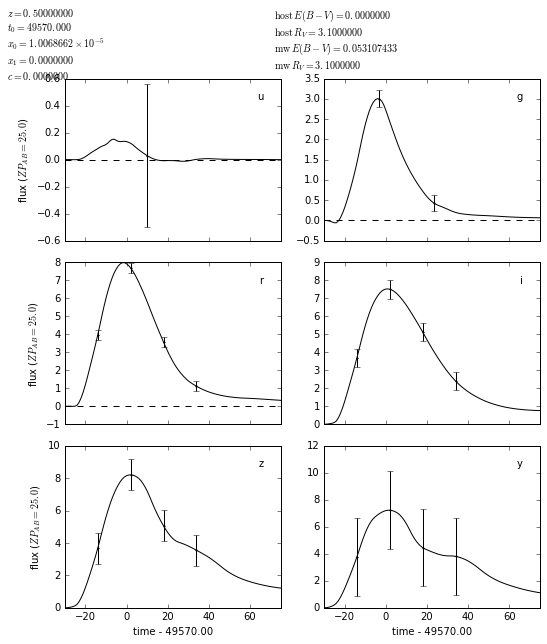

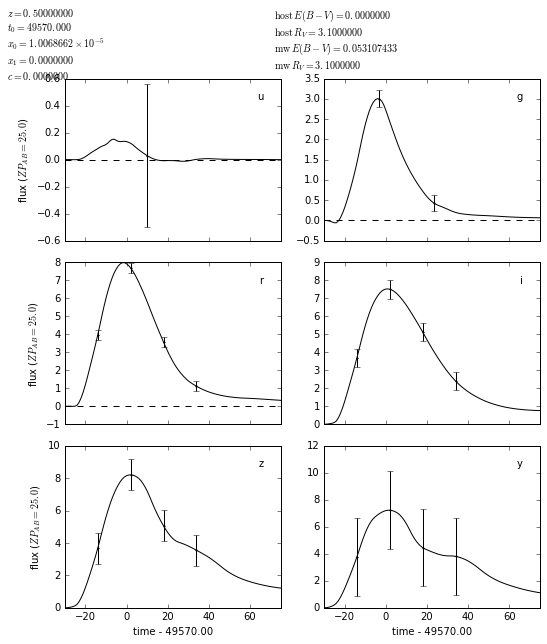

In [41]:
q.lcplot()

In [40]:
xx

,time,band,flux,fluxerr,zp,zpsys,SNR,fiveSigmaDepth,night,DetectionEfficiency,mag
10,49572.000000,r,7.679149e-10,2.853260e-11,0,ab,26.913595,24.7,49572,NaN,22.786717
5,49572.000000,i,7.497263e-10,5.147598e-11,0,ab,14.564584,24.0,49572,NaN,22.812743
9,49556.000000,r,3.954332e-10,2.728428e-11,0,ab,14.493081,24.7,49556,NaN,23.507317
1,49566.666667,g,3.002238e-10,2.079144e-11,0,ab,14.439781,25.0,49566,NaN,23.806387
11,49588.000000,r,3.563275e-10,2.714989e-11,0,ab,13.124457,24.7,49588,NaN,23.620377
6,49588.000000,i,5.113908e-10,5.088777e-11,0,ab,10.049384,24.0,49588,NaN,23.228118
22,49572.000000,z,8.206990e-10,9.636801e-11,0,ab,8.516301,23.3,49572,NaN,22.714540
4,49556.000000,i,3.683476e-10,5.053145e-11,0,ab,7.289473,24.0,49556,NaN,23.584355
23,49588.000000,z,5.056733e-10,9.577693e-11,0,ab,5.279699,23.3,49588,NaN,23.240325
7,49604.000000,i,2.395472e-10,5.020845e-11,0,ab,4.771053,24.0,49604,NaN,24.051522


In [34]:
xx.groupby('band').get_group('r')

,time,band,flux,fluxerr,zp,zpsys,SNR,fiveSigmaDepth,night,DetectionEfficiency,mag
10,49572,r,7.679149e-10,2.853260e-11,0,ab,26.913595,24.7,49572,NaN,NaN
9,49556,r,3.954332e-10,2.728428e-11,0,ab,14.493081,24.7,49556,NaN,NaN
11,49588,r,3.563275e-10,2.714989e-11,0,ab,13.124457,24.7,49588,NaN,NaN
12,49604,r,1.109986e-10,2.629115e-11,0,ab,4.221899,24.7,49604,NaN,NaN


In [ ]:
import opsimsummary as oss

In [ ]:
print(dir(oss))

In [ ]:
q.SN.SNstate

In [ ]:
model = sncosmo.Model(source='salt2')

In [ ]:
model.set(**q.SN.sncosmoParamDict(q.SN.SNstate, model))

In [ ]:
snState = deepcopy(q.SN.SNstate)

In [ ]:
model.set(z=0.7)
model.set_source_peakabsmag(-19.5, 'bessellB', 'ab')

In [ ]:
snState['z'] = model.get('z')

In [ ]:
snState['x0'] = model.get('x0')

In [ ]:
print snState

In [ ]:
newQM = PerSNMetric(summarydf=observations.summary, t0=49570,  raCol='ra', decCol='dec', lsst_bp=lsst_bp, snState=snState)

In [ ]:
print newQM.snState